# Lab 1 : Reminders on data manipulation and visualisation using Python : Titanic Dataset

This webpage is a "Jupyter Notebook" : It is a special type of Python file that you can open and execute using a web browser. This document is made of plain text containing questions and explanations, as well as fields with code, which sometimes will be empty and for you to fill up or to complete.

For a Jupyter Notebook to work properly, you need to run the different code fields after writing them. This means, that unlike in a regular Python file, if you edit something at the beginning of the page, you may have to re-run exerything in order for the effects to apply on all future fields and variables. 
Please note that as we will progress in this course, there will be less and less pre-filled code, and at some point, you will have to create the full code/notebook yourself.

The goal of this first lab is to remind you some of the basics of handling Data in python, as well as basic visualisation functions, and to compute some very basic statistics.

## Part A: RMS Titanic

In this first lab, we will study a dataset dealing with the passengers of the RMS Titanic. This dataset was built using data found about the original passengers and is therefore incomplete.

In the next block, you will find a very important piece of code to import some basic libraries that you will use for pretty much all labs:
- pandas for data and files management
- numpy for basic mathematics in Python
- matplotlib for graphics and visuals
- seaborn : another graphics library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Question 1 : Open the file "titanic_full.csv" with a regular text editor. What can you tell about the method used to separate the different columns ? Use your answer to this question to fill up the code below and open the file in Python using the pandas library.

In [2]:
titanic_data = pd.read_csv("Data/titanic_full.csv",sep=",",index_col=0);

Now that you have loaded the data as a pandas dataframe named "titanic-data", we will take a look at some basic properties of this object. 
Try the following properties and functions, look at the result and explain what they do:
- The head() function
- The shape property
- The dtypes property

In [3]:
titanic_data.head()

,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
FullName     object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<u>Answer 1:</u>

We use the ';' delimeter and set the first column as indexing column with PassengerId

#### Question 2 : One important thing to consider with this dataset is the number of missing data. Using the function .isnull() and the function .sum() of the dataframe object, find out where and how many missing data there are in this dataset.

In [6]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
FullName      0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Pandas dataframe allow for an easy access to the lines and columns of a dataset. For instance, the code below gives access to the column containing the age of the passengers.

In [7]:
titanic_data["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

Likewise, the .loc and .iloc properties are useful to select singles lines from a dataset :

In [8]:
titanic_data.loc[30]

Survived             0
Pclass               3
Name          Todoroff
FullName     Mr. Lalio
Sex               male
Age                NaN
SibSp                0
Parch                0
Ticket          349216
Fare            7.8958
Cabin              NaN
Embarked             S
Name: 30, dtype: object

In [9]:
titanic_data.iloc[30]

Survived                 0
Pclass                   1
Name             Uruchurtu
FullName     Don. Manuel E
Sex                   male
Age                   40.0
SibSp                    0
Parch                    0
Ticket            PC 17601
Fare               27.7208
Cabin                  NaN
Embarked                 C
Name: 31, dtype: object

#### Question 3 : Based on the 2 previous code blocks and the internet, explain the difference between .loc and .iloc .

<u>Answer 3</u>

- loc uses the indexing of the dataset (which here starts at 1), but it could very well be a label.
- iloc uses Python array indexing (which always starts at 0).




#### Question 4 : Using the previous answers, retrieve the following: a) the age of the passenger with PassengerID number 119, b) The family name of the passenger whose array index is 138.

In [10]:
titanic_data["Age"].loc[119]

24.0

In [11]:
titanic_data["Name"].iloc[138]

'Osen'

In the example below, we show how to select only female passengers by using a filter based on the columns.

In [12]:
titanic_women = titanic_data[titanic_data['Sex']=='female']
titanic_women

,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
881,1,2,Shelley,Mrs. William (Imanita Parrish Hall),female,25.0,0,1,230433,26.0000,NaN,S
883,0,3,Dahlberg,Miss. Gerda Ulrika,female,22.0,0,0,7552,10.5167,NaN,S
886,0,3,Rice,Mrs. William (Margaret Norton),female,39.0,0,5,382652,29.1250,NaN,Q


#### Question 5 : Using a similar syntax and what you learn about the .loc property, propose a solution to filter the passengers accordingly: a) only the passengers whose Age is greater than 30 years old ; b) Passengers that embarked in Cherbourg and survived ; c) Passengers whose Age is unknown and did not survive.

In [13]:
titanic_30p = titanic_data[titanic_data['Age']>=30]
titanic_30p

,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
12,1,1,Bonnell,Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,0,3,Vander Cruyssen,Mr. Victor,male,47.0,0,0,345765,9.0000,NaN,S
880,1,1,Potter,Mrs. Thomas Jr (Lily Alexenia Wilson),female,56.0,0,1,11767,83.1583,C50,C
882,0,3,Markun,Mr. Johann,male,33.0,0,0,349257,7.8958,NaN,S


In [14]:
titanic_cherbourg_survived = titanic_data.loc[ (titanic_data['Embarked']=='C') & (titanic_data['Survived']==1) ]
titanic_cherbourg_survived

,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
20,1,3,Masselmani,Mrs. Fatima,female,NaN,0,0,2649,7.2250,NaN,C
32,1,1,Spencer,Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
37,1,3,Mamee,Mr. Hanna,male,NaN,0,0,2677,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
867,1,2,Duran y More,Miss. Asuncion,female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
875,1,2,Abelson,Mrs. Samuel (Hannah Wizosky),female,28.0,1,0,P/PP 3381,24.0000,NaN,C
876,1,3,Najib,Miss. Adele Kiamie Jane,female,15.0,0,0,2667,7.2250,NaN,C


In [15]:
titanic_uage_died = titanic_data.loc[ (titanic_data['Age'].isnull()) & (titanic_data['Survived']==0) ]
titanic_uage_died 

,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
6,0,3,Moran,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q
27,0,3,Emir,Mr. Farred Chehab,male,NaN,0,0,2631,7.2250,NaN,C
30,0,3,Todoroff,Mr. Lalio,male,NaN,0,0,349216,7.8958,NaN,S
43,0,3,Kraeff,Mr. Theodor,male,NaN,0,0,349253,7.8958,NaN,C
46,0,3,Rogers,Mr. William John,male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,Razi,Mr. Raihed,male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,Sage,Miss. Dorothy Edith Dolly,female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,van Melkebeke,Mr. Philemon,male,NaN,0,0,345777,9.5000,NaN,S


#### Question 6 : The following code uses other basic and usefull pandas functions. Run it, and explain what it does.

In [16]:
def pourcentageDf(df):
    return 100*df.value_counts()/df.shape[0]

pctSH= pourcentageDf(titanic_data[titanic_data['Sex']=='male']['Survived'])
pctSF= pourcentageDf(titanic_data[titanic_data['Sex']=='female']['Survived'])

result = pd.concat([pctSH, pctSF], axis=1)
result.columns = ['Hommes','Femmes']
result

,Hommes,Femmes
Survived,,
0,81.109185,25.796178
1,18.890815,74.203822


<u>Answer 6 :</u>

It displays the survivor and dead persons by sex.

We will now check some basic numpy, pandas and other python functions for statistics and data visualization.

Let us first use the describe() function which returns some basic statistics:

In [17]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Question 7 : Explain what are the different lines (which statistics is computed) ?

<u>Answer 7 :</u>
- count : number of non-null lines
- mean : the mean
- std : the standard deviation
- min : the min value
- max : the max value
- 25%, 50%, 75% : the value for the 3 first quartiles.

#### Question 8 : Using numpy functions, compute the mean, the standard deviation and the variance for the Age of the passengers.

In [18]:
np.mean(titanic_data["Age"])

29.69911764705882

In [19]:
sd = np.std(titanic_data["Age"])
sd

14.516321150817316

In [20]:
sd**2

210.72357975366614

#### Question 9 : find 3 different ways to plot the histogram of the passenger's age using the matplotlib, pandas and seaborn libraries. You will be careful to use an appropriate number of bins. Comment on the differences.

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

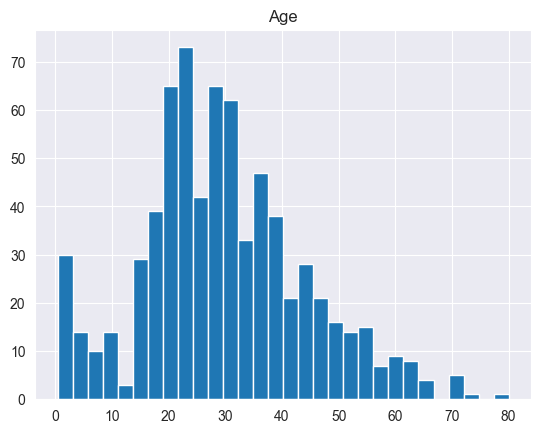

In [21]:
#with pandas 
titanic_data.hist(column='Age',bins=30)

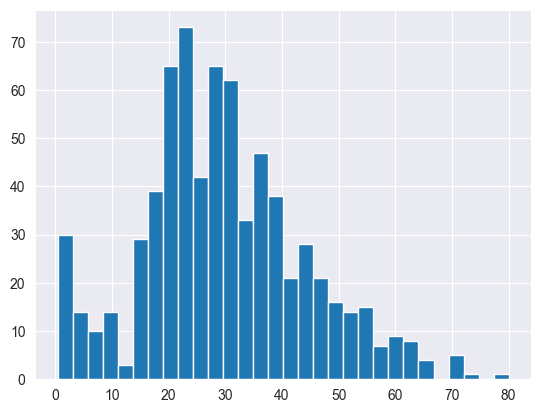

In [22]:
#with matplotlib
plt.hist(titanic_data["Age"],bins=30)
plt.show()

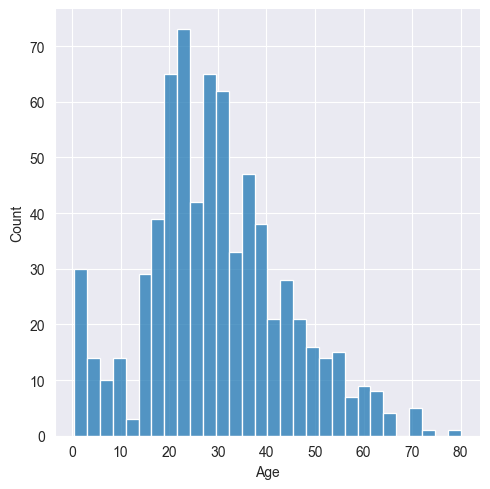

In [23]:
#with seaborn
sns.displot(titanic_data['Age'],bins=30)

<u>Answer 9</u>

The three visualisation methods are very simillar, the parameters are almost the same, we can choose whichever liblary we want. 

#### Question 10 : Using the library of your choice, display the histogram for the tickets prices. Comment on the resulting distribution.

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

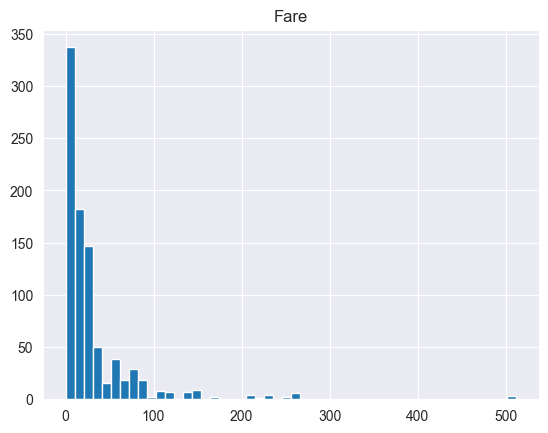

In [24]:
titanic_data.hist(column='Fare',bins=50)

<u>Answer 10 : </u>

We can tell that most prices were between 0 and 10 and than the higher prices distribution is decreasing proportionally

We will now use a pie plot (camembert en français) to display the percentage of survivors :

<Axes: ylabel='count'>

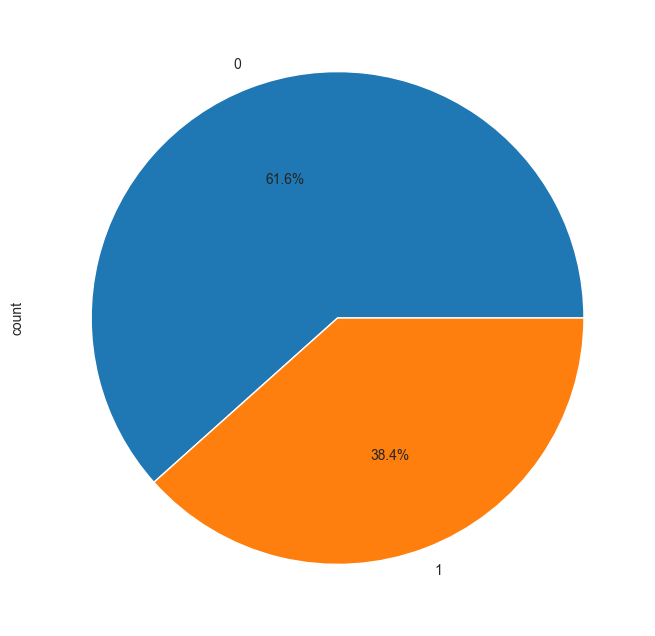

In [25]:
titanic_data['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

#### Question 11 : Using the previous example, display the passengers according to their class (1st, 2nd, 3rd)

<Axes: ylabel='count'>

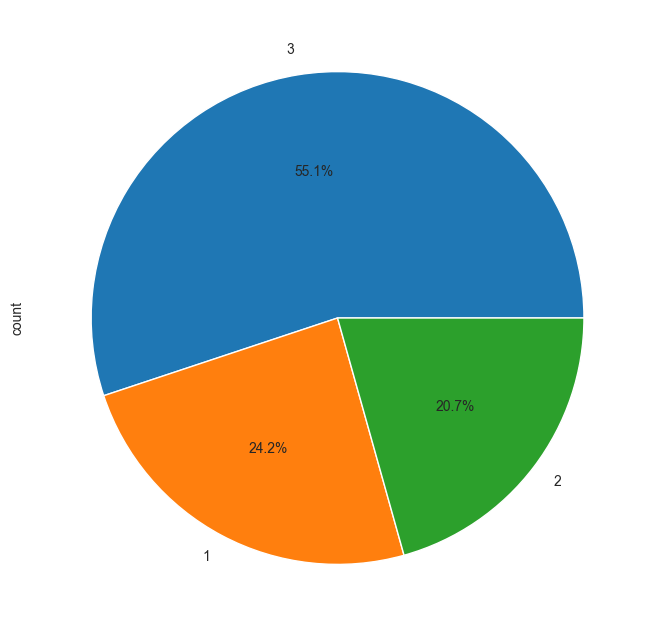

In [26]:
titanic_data['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

We will now display the survival chances of the passengers according to the class in which they travelled. To this end, and using the crosstab() function from pandas, generate the 4 following graphs :
- Pie plot and bivariate histogram of the class depending on the survival status
- Pie plot and bivariate histogram of survival status based on the class

<Axes: xlabel='Pclass'>

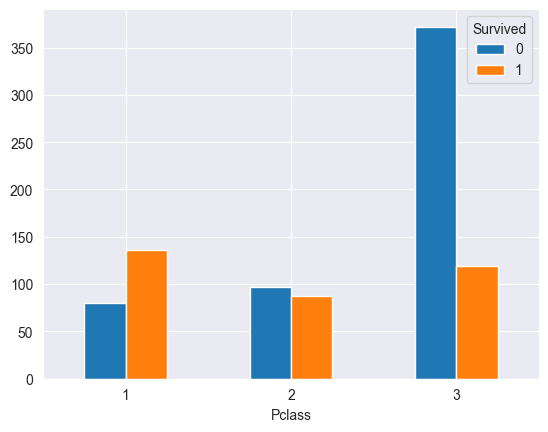

In [27]:
ct = pd.crosstab(titanic_data['Pclass'],titanic_data['Survived'])
ct.plot.bar(rot=0)

array([<Axes: ylabel='0'>, <Axes: ylabel='1'>], dtype=object)

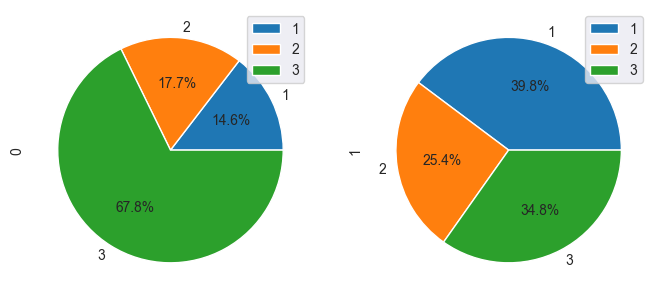

In [28]:
ct.plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(8, 8))

<Axes: xlabel='Survived'>

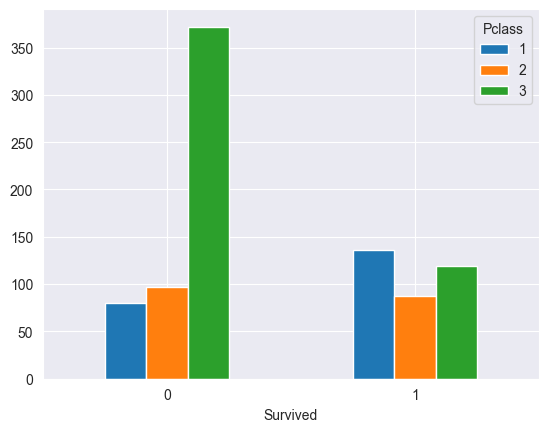

In [29]:
ct2 = pd.crosstab(titanic_data['Survived'],titanic_data['Pclass'])
ct2.plot.bar(rot=0)

array([<Axes: ylabel='1'>, <Axes: ylabel='2'>, <Axes: ylabel='3'>],
      dtype=object)

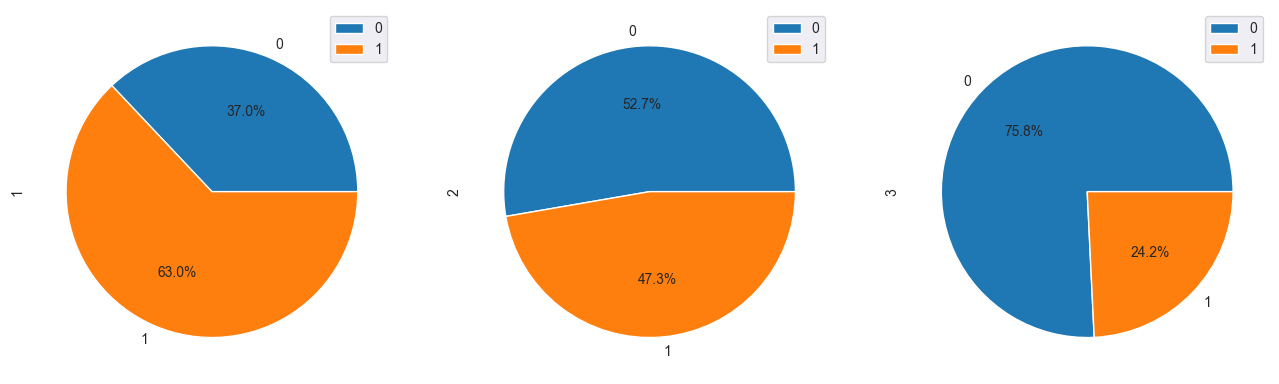

In [30]:
ct2.plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(16, 8))

#### Question 12 : Explain what each of the different visualization brings, and comment on an eventual link between the travel class and chances of survival.

<u>Answer 12 :</u>

From the last chart we can tell that people from lower classes had more chance to die than from higher ones

We will now take a look at how the "women and children first" policy was respected (or not) on board the RMS Titanic given that there was only a limited number of lifeboat. To do so, we first create a "Status" column to filter the passengers into 4 categories "adult male", "adult female", "female child" and "male child". Please note that we make the choice of considering passengers of unknown age as adults.

In [31]:
titanic_data['Status'] = titanic_data.loc[:, 'Sex']
titanic_data.loc[ titanic_data["Sex"]=="male" , 'Status' ]="adult male"
titanic_data.loc[ titanic_data["Sex"]=="female" , 'Status' ]="adult female"
titanic_data.loc[ (titanic_data["Age"]<18) & (titanic_data["Sex"]=="female") , 'Status' ]="female child"
titanic_data.loc[ (titanic_data["Age"]<18) & (titanic_data["Sex"]=="male") , 'Status' ]="male child"
titanic_data

,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
PassengerId,,,,,,,,,,,,,
1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult male
2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,adult female
3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult female
4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,adult female
5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,adult male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Montvila,Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S,adult male
888,1,1,Graham,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,adult female
889,0,3,Johnston,Miss. Catherine Helen Carrie,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,adult female


#### Question 13 : Using the previous visualizations and the newly created variable, propose one or several useful graphics to comment on the "women and children first policy" on board the RMS Titanic.

array([<Axes: ylabel='adult female'>, <Axes: ylabel='adult male'>,
       <Axes: ylabel='female child'>, <Axes: ylabel='male child'>],
      dtype=object)

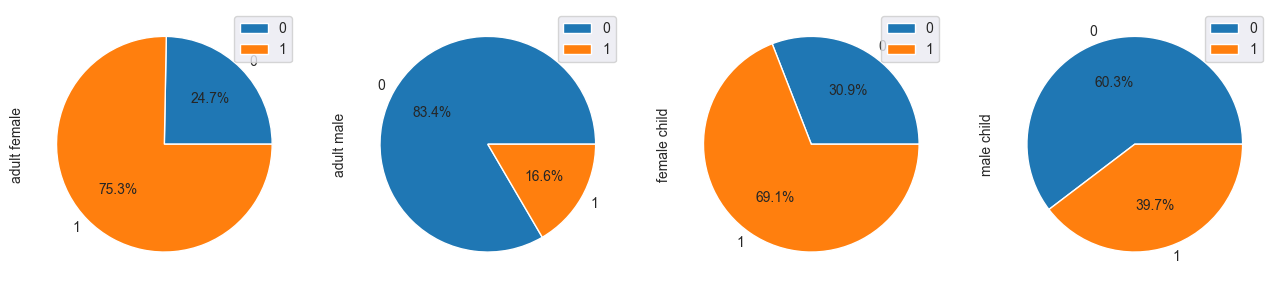

In [32]:
ct3 = pd.crosstab(titanic_data['Survived'],titanic_data['Status'])
ct3.plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(16, 16))

<u>Answer 13 :</u>

More female survived than male and also more male children than male adults.

## Part B : Malnutrition and IQ

In this exercise, we want to assess the affect of malnutrition on the human IQ. We know that the average IQ follows a normal law with a mean of 100 and a standard deviation of 15. Based on these, in this exercise we will try to determine how significant is the effect of malnutrition on the human IQ.

#### Question 1 : Using the command the panda library, open the file "malnutrition.csv" which contain the IQ scores of people that suffered from malnutrition. How many persons does this sample contain ?

In [33]:
df = pd.read_csv("Data/malnutrition.csv",header=None)
df

,0
0,97
1,83
2,76
3,87
4,74
...,...
95,89
96,80
97,91
98,92


In [34]:
size=df.shape[0]
size

100

#### Question 2 : Compute the mean IQ and standard deviation deviation for this sample

In [35]:
meanQImalnut=np.mean(df[0])
stdQImalnut=np.std(df[0])

[meanQImalnut,stdQImalnut]

[87.98, 9.629101723421556]

#### Question 3 : Using the statistical tools at your disposal, what can you conclude on the effect of malnutrition on the human IQ when comparing your previous results to the data from the general population ? Justify your answer.

In [36]:
IC95minus=meanQImalnut-1.96*stdQImalnut/np.sqrt(size)
IC95plus=meanQImalnut+1.96*stdQImalnut/np.sqrt(size)

[IC95minus,IC95plus]

[86.09269606220938, 89.86730393779062]

<u>Answer 3 :</u>

When computing the confidence interval for this sample, we see that the value 100 which is the mean regular IQ for the general population is not within the bounds of the 95% interval. We can therefore conclude that malnutrition has an effect on IQ.

## Part C : Ill-formated Data

We will know try to study an anonimzed CSV file from a previous class if ING2. This file cntains marks for several labs, a project and a final exam. Additional columns have been created with their mean lab mark, their final mark, their rank within the class and their GPA. 

This file has been created with MS Excel and has some issues that make it difficult to open it directly : you can try !

In [37]:
#notes = pd.read_csv("Data/notes.csv",sep=";");

#### Question 1 : Open this file with another software, list and figure out the issues, and then find solutions in order to open it with Pandas.

<u>Answer 1 :</u>

- Extra elements in columns 14 and 15: Ensure all rows have the same number of columns.
- Strange characters causing loading issues: Remove or replace these characters.
- Commas used instead of periods for floating-point numbers: Replace commas with periods.

In [38]:
notes = pd.read_csv("Data/notes_fixed.csv",sep=";")

# Define the function to replace commas with periods
def replace_commas(val):
    if isinstance(val, str):
        return val.replace(',', '.')
    return val

# Apply the replacement function to all columns
notes = notes.applymap(replace_commas)

# Specify columns that should remain as text
text_columns = ['Rank', 'GPA']

# Convert only numeric columns to numeric type, forcing errors to NaN
numeric_columns = notes.columns.difference(text_columns)
notes[numeric_columns] = notes[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaN values if necessary (e.g., with 0 or another strategy)
notes.fillna(0, inplace=True)

notes.head()

C:\Users\Kuba\AppData\Local\Temp\ipykernel_19508\4131333069.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  notes = notes.applymap(replace_commas)


,Lab1,Lab2,Lab3,Lab4,Lab5,Lab6,Lab7,Avg lab mark,Project,Final Exam,Final Mark,Rank,GPA
0,10.75,16.875,16.00,17.000,13.375,12.875,18.50,15.77,11.0,9.75,11.567708,40,D
1,13.25,14.625,13.50,6.875,12.375,15.000,14.25,13.83,11.0,9.75,11.083333,43,D
2,15.25,15.000,5.25,10.500,13.750,14.500,13.75,13.79,12.0,7.25,10.072917,50,E
3,16.00,16.500,17.50,13.250,18.125,19.000,19.00,17.69,9.0,16.75,15.046875,7,B
4,15.25,19.125,20.00,15.500,16.500,20.000,17.00,18.02,14.0,14.00,15.005208,8,B


#### Question 2 : Display the histogram of marks for lab number 1

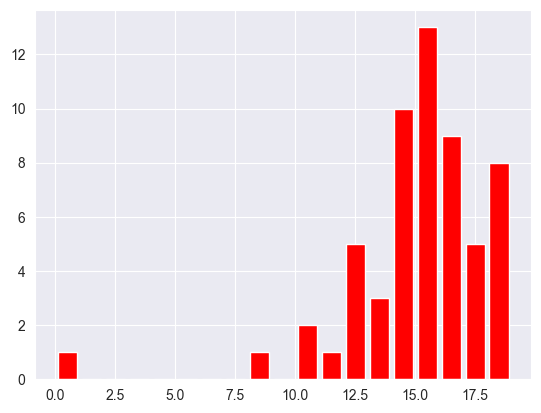

In [39]:
plt.hist(notes["Lab1"],bins=range(0,20),color='red',rwidth=0.8)
plt.show()

#### Question 3 : Display of pie plot the GPA repartition. You will display the percentages in your plot.

<Axes: ylabel='count'>

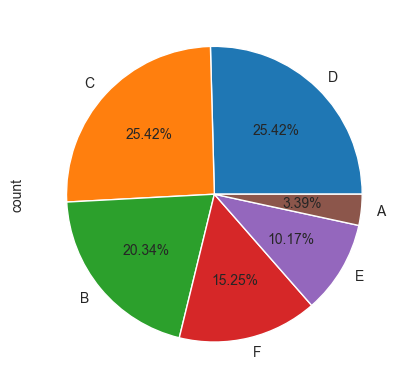

In [40]:
GPA=notes['GPA'].value_counts()
GPA.plot(kind='pie',autopct="%.2f%%")

#### Question 4 : Using the statistical tools at your disposal, comment on whether the students did best with the labs, or with the final exam.

In [41]:
mean_lab=np.mean(notes["Avg lab mark"])
mean_lab

15.348813559322032

In [42]:
mean_exam=np.mean(notes["Final Exam"])
mean_exam

10.317796610169491

<u>Answer 4 :</u>
They did best at the labs. No need to compute confidence intervals here.

## Part D : Data from a table

Until now, you have dealt with data loaded from CSV files. But in certain cases, you may have to copy a table or a data set from an external source, such as a PDF or a book. In this case, you will have to create the data manually. 
In this exercise, we consider the following contingency table that lists marks and number of students that had each mark: for instance 48 students had the mark 12/20 and 10 of them had 6/20.

| Mark            | 6  | 8  | 9  | 10 | 11 | 12 | 13 | 14 | 17 |
|-----------------|----|----|----|----|----|----|----|----|----|
| Nbr of students | 10 | 12 | 48 | 23 | 24 | 48 | 9  | 13 | 22 |


#### Question 1 : Propose a way to create this dataset in Python so that you can then compute several univariate statitics. There are several possibilities.

In [43]:
Marks = [6,8,9,10,11,12,13,14,17]
Students = [10,12,48,23,24,48,9,13,22]

#### Question 2 : Display the histogram of the marks for this dataset.

Text(0, 0.5, 'Frequency')

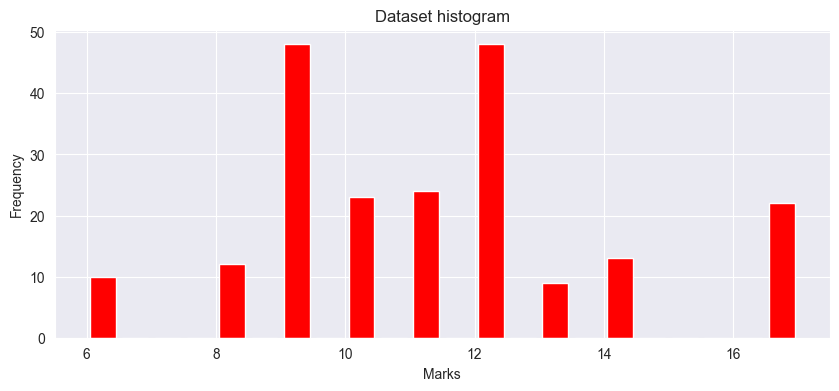

In [44]:
figure,axe = plt.subplots(figsize=(10,4))
plt.hist(Marks,bins=22,color='red',weights=Students,rwidth=0.8)
axe.set_title("Dataset histogram")
axe.set_xlabel("Marks")
axe.set_ylabel("Frequency")

#### Question 3 : Compute the mean, the median and the variance for this dataset. Remark, you may use functions from the scipy library.

In [45]:
from scipy import stats

In [46]:
totalmark=[a*b for a,b in zip(Marks,Students)]
mean = np.sum(totalmark)/np.sum(Students)
mean

11.15311004784689

In [47]:
dispersion_mark_median = stats.binned_statistic(Students,Marks,statistic="median",bins=1)
median = dispersion_mark_median[0][0]
median

11.0

In [48]:
numvar = []
i=0
while i<len(Marks):
    numvar.append(Marks[i]*(Marks[i]-mean)**2)
    i+=1

variance = sum(numvar)/sum(Students)
variance

4.984317029214305